In [4]:
!pip install plotly

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [5]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('titanic_train.csv')

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
pd.set_option('display.max_colum', 100)
pd.set_option('display.max_rows', 100)


In [10]:
print(df.shape)

(891, 12)


In [11]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [13]:
#установим целочисленную плату за проезд
df['Fare'] = df['Fare'].astype('int64')
#pandas тип данных "объект" указывает смешанные типы, а не Тип str
df['Cabin'] = df['Cabin'].astype('str')
df['Embarked'] = df['Embarked'].astype('str')

In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null int64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(1), int64(6), object(5)
memory usage: 83.6+ KB
None


In [15]:
df.sort_values(by='Age', ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7,nan,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49,nan,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7,nan,Q


In [16]:
df.sort_values(by=['Pclass','Age'],ascending=[True, False]).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30,A23,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34,A5,C
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49,nan,C
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71,B22,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61,B30,C


In [17]:
df.apply(np.max)

PassengerId                            891
Survived                                 1
Pclass                                   3
Name           van Melkebeke, Mr. Philemon
Sex                                   male
Age                                     80
SibSp                                    8
Parch                                    6
Ticket                           WE/P 5735
Fare                                   512
Cabin                                  nan
Embarked                               nan
dtype: object

In [18]:
d = {0 : False, float('nan') : 'No'}
df['Survived'] = df['Survived'].map(d)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7,nan,S
1,2,NaN,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71,C85,C
2,3,NaN,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7,nan,S
3,4,NaN,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53,C123,S
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8,nan,S


In [19]:
import warnings
warnings.simplefilter('ignore')
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
from pylab import  rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd

In [20]:
df = pd.read_csv('titanic_train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [21]:
df = df.dropna()
print(df.shape)

(183, 12)


In [22]:
useful_cols = ['Name','Sex','Age','Ticket',
               'PassengerId','Pclass','Fare',
               'Cabin','Embarked','Parch','SibSp','Survived']
df[useful_cols].head()

,Name,Sex,Age,Ticket,PassengerId,Pclass,Fare,Cabin,Embarked,Parch,SibSp,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,2,1,71.2833,C85,C,0,1,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,4,1,53.1000,C123,S,0,1,1
6,"McCarthy, Mr. Timothy J",male,54.0,17463,7,1,51.8625,E46,S,0,0,0
10,"Sandstrom, Miss. Marguerite Rut",female,4.0,PP 9549,11,3,16.7000,G6,S,1,1,1
11,"Bonnell, Miss. Elizabeth",female,58.0,113783,12,1,26.5500,C103,S,0,0,1


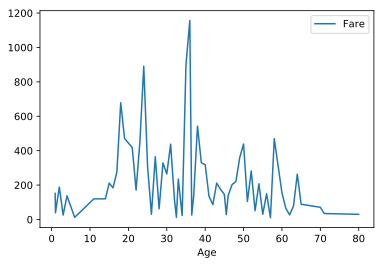

In [23]:
sales_df = df[['Fare', 'Age']]
sales_df.groupby('Age').sum().plot()

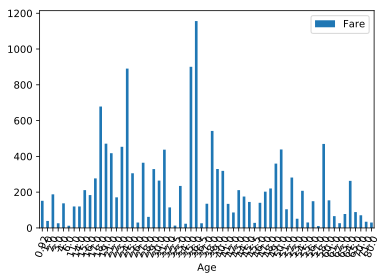

In [24]:
sales_df.groupby('Age').sum().plot(kind='bar', rot=70)

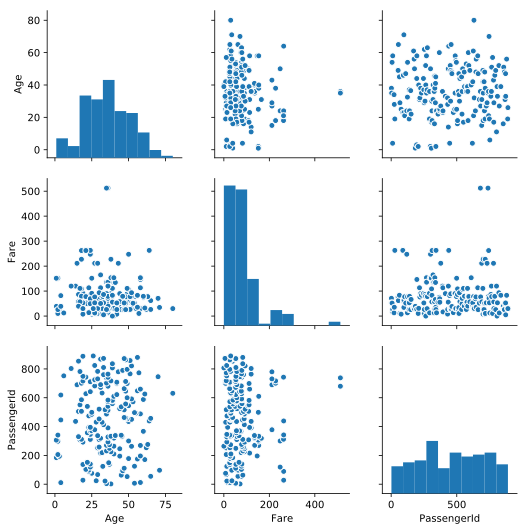

In [25]:
cols = ['Age', 'Fare', 'PassengerId']
sns.pairplot(df[cols])
# sns_plot.savefig('pairplot.png')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


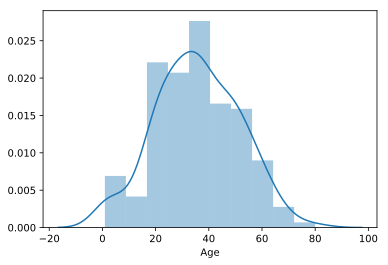

In [26]:
sns.distplot(df.Age)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


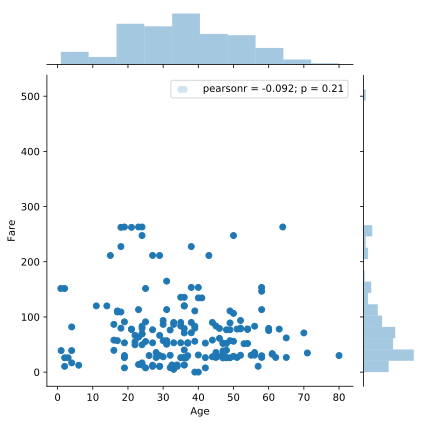

In [27]:
sns.jointplot(df.Age, df.Fare) #взаимосвязь двух признаков

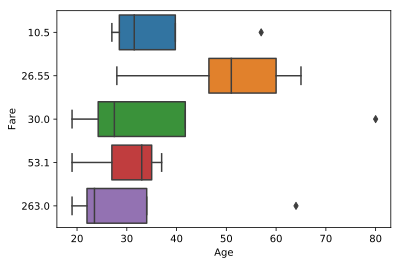

In [28]:
top_Fare = df.Fare.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y="Fare", x="Age", data=df[df.Fare.isin(top_Fare)], orient="h")

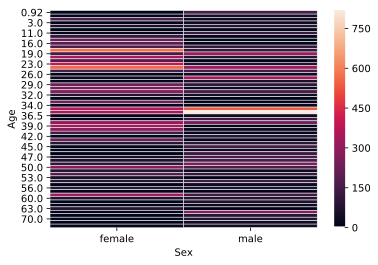

In [29]:
age_sex_fare = df.pivot_table(
    index='Age',
    columns='Sex',
    values='Fare',
    aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(age_sex_fare, annot=False, fmt=".1f",linewidths=.5)

In [30]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [31]:
age_df = df.groupby('Age')[['Fare']].sum().join(
    df.groupby('Age')[['Name']].count()
)
age_df.columns = ['Fare','Pclass']


trace0 = go.Scatter(
    x=age_df.index,
    y=age_df.Pclass,
    name='Pclass'
)


trace1 = go.Scatter(
    x=age_df.index,
    y=age_df.Fare,
    name='Fare'
)


data = [trace0,trace1]
layout = {'title': 'Статистика платы за проезд'}

fig = go.Figure(data=data, layout=layout)
iplot(fig,show_link=False)

In [32]:
plotly.offline.plot(fig, filename='age.html', show_link=False)

'file://C:\\Users\\TEMP.EDU.044\\age.html'

In [33]:
platforms_df = df.groupby('Name')[['Fare']].sum().join(
    df.groupby('Name')[['Name']].count()
)
platforms_df.columns = ['Fare', 'Pclass']
platforms_df.sort_values('Fare', ascending=False, inplace=True)

# Создаем traces для визуализации
trace0 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Pclass,
    name='Pclass'
)

trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Fare,
    name='Fare'
)

#создаем массив с данными и задаем title для графика и оси х в layout
data = [trace0, trace1]
layout = {'title': 'Share of Pclass', 'xaxis': {'title': 'Pclass'}}

#создаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [49]:
# создаем Box trace
data = []
for Age in df.Age.unique():
    data.append(
        go.Box(y=df[df.Age==Age].Fare, name=Age)
    )
    
# визуализируем данные
iplot(data, show_link = True)